In [1]:
import cv2
import numpy as np
# read and scale down image
from google.colab.patches import cv2_imshow
import os

In [2]:
def boundingBoxes(img):
  # Resize Image
  img_orig = cv2.resize(img, (400,400))
  # threshold Image
  ret, threshed_img = cv2.threshold(img,127, 255, cv2.THRESH_OTSU) 
  # find contours and get the external one
  contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  x_main = y_main = w_main = h_main = 0.
  maxArea=0

  for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    # print(x,y,w,h)
    if maxArea<w*h:
      x_main, y_main, w_main, h_main = x, y, w, h
      maxArea = w*h

  # draw a green rectangle to visualize the bounding rect
  # cv2.rectangle(img, (x-excess, y-excess), (x+w+excess, y+h+excess), (255, 255, 255), 1)
  return x_main, y_main, w_main, h_main


In [3]:
def convertToYoloFormat(coordinates, imgDim):

  xCenter = coordinates[0]+coordinates[2]/2
  yCenter = coordinates[1]+coordinates[3]/2
  xCenter = xCenter/imgDim
  yCenter = yCenter/imgDim
  
  width = min(coordinates[2]/imgDim + 0.20, 2*min(1-xCenter, xCenter))
  height = min(coordinates[3]/imgDim + 0.20, 2*min(1-yCenter, yCenter))

  return xCenter, yCenter, width, height

In [4]:
def writeCoordsToFile(classNum, path, img_name, coordinates):

  # os.path.join(path, img_name)
  f = open(os.path.join(path, img_name), "x")
  f.write((classNum) + ' ' + str(coordinates[0]) + ' ' + str(coordinates[1]) + ' ' + str(coordinates[2]) + ' ' + str(coordinates[3]))
  f.close()

In [26]:
# /content/drive/MyDrive/MSTAR_Project/dataset/datasetFolder/train/2S1/hb19377.jpeg

img_path = '/content/drive/MyDrive/MSTAR_Project/dataset/datasetFolder/train/img/2S1/01915.jpeg'
img = cv2.pyrDown(cv2.imread(img_path, cv2.IMREAD_UNCHANGED))
x,y,w,h = boundingBoxes(img)
print(x,y,w,h)
# x,y,w,h = convertToYoloFormat([x,y,w,h], img.shape[0])
# print(x,y,w,h)
# writeCoordsToFile('0' , '/content/drive/MyDrive/MSTAR_Project', 'trial.txt', [x,y,w,h])

28 36 20 8


In [27]:
# print(img.shape)
cv2.rectangle(img, (x-5,y-5), (w+x+5,h+y+5), (255, 255, 255), 1)

array([[22, 21, 38, ..., 26, 26, 21],
       [29, 24, 33, ..., 29, 26, 22],
       [37, 27, 28, ..., 19, 22, 19],
       ...,
       [28, 26, 23, ..., 26, 17, 22],
       [31, 26, 24, ..., 28, 21, 22],
       [19, 21, 27, ..., 26, 27, 24]], dtype=uint8)

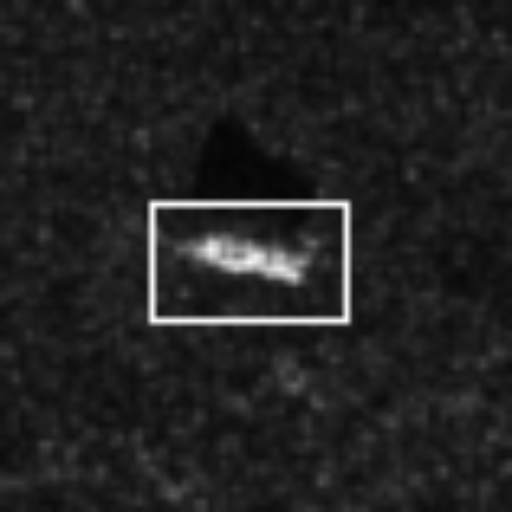

In [28]:
cv2_imshow(cv2.resize(img, (512, 512)))

In [ ]:
renameFileNum = 0

_src = "/content/drive/MyDrive/MSTAR_Project/dataset/datasetFolder/train"
_ext = ".jpeg"
for classFolder in os.listdir(_src):
  print(classFolder)
  _inSrc = os.path.join(_src,classFolder)
  if _inSrc.endswith('DS_Store'):
    continue
  for i,filename in enumerate(os.listdir(_inSrc)):
    # print(filename)
    if filename.endswith(_ext):

      os.rename(_inSrc+'/' + filename, _inSrc+'/' + str(renameFileNum).zfill(5)+_ext)
      renameFileNum+=1

.DS_Store
BTR60
T62
T72
ZSU_23_4
BRDM_2
BTR70
D7
2S1
BMP2
ZIL131


In [ ]:
_src = "/content/drive/MyDrive/MSTAR_Project/dataset/datasetFolder/test"
_ext = ".jpeg"
for classFolder in os.listdir(_src):
  print(classFolder)
  _inSrc = os.path.join(_src,classFolder)
  if _inSrc.endswith('DS_Store'):
    continue
  for i,filename in enumerate(os.listdir(_inSrc)):
    # print(filename)
    if filename.endswith(_ext):

      os.rename(_inSrc+'/' + filename, _inSrc+'/' + str(renameFileNum).zfill(5)+_ext)
      renameFileNum+=1

T72
BTR60
D7
2S1
BRDM_2
T62
ZIL131
BMP2
ZSU_23_4
BTR70


In [ ]:
classes = {
  "T72":0,
  "BTR60":1,
  "D7":2,
  "2S1":3,
  "BRDM_2":4,
  "T62":5,
  "ZIL131":6,
  "BMP2":7,
  "ZSU_23_4":8,
  "BTR70tdic":9
}

0